In [9]:
%matplotlib inline 

import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [10]:
df = pd.read_table('fruit_data.txt')
df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
fruit_label      59 non-null int64
fruit_name       59 non-null object
fruit_subtype    59 non-null object
mass             59 non-null int64
width            59 non-null float64
height           59 non-null float64
color_score      59 non-null float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.3+ KB


In [12]:
df.describe(include='all')

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
count,59.000000,59,59,59.000000,59.000000,59.000000,59.000000
unique,NaN,4,10,NaN,NaN,NaN,NaN
top,NaN,apple,unknown,NaN,NaN,NaN,NaN
freq,NaN,19,10,NaN,NaN,NaN,NaN
mean,2.542373,NaN,NaN,163.118644,7.105085,7.693220,0.762881
std,1.208048,NaN,NaN,55.018832,0.816938,1.361017,0.076857
min,1.000000,NaN,NaN,76.000000,5.800000,4.000000,0.550000
25%,1.000000,NaN,NaN,140.000000,6.600000,7.200000,0.720000
50%,3.000000,NaN,NaN,158.000000,7.200000,7.600000,0.750000
75%,4.000000,NaN,NaN,177.000000,7.500000,8.200000,0.810000


In [13]:
df.fruit_label.unique()

array([1, 2, 3, 4], dtype=int64)

In [14]:
df.fruit_name.unique()

array(['apple', 'mandarin', 'orange', 'lemon'], dtype=object)

<Figure size 1440x360 with 0 Axes>

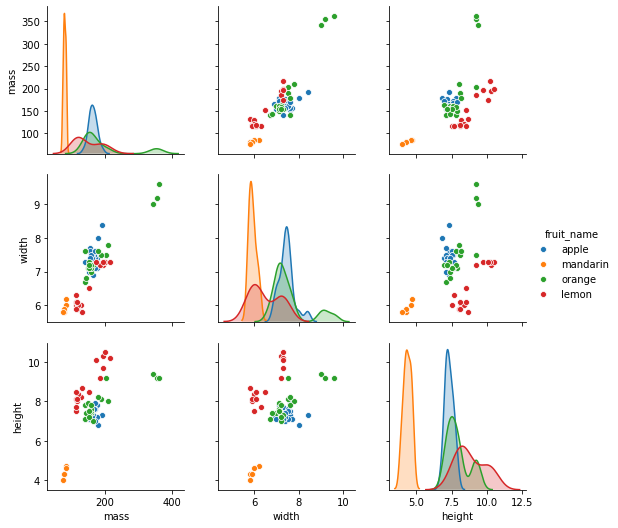

In [26]:
fig = plt.figure(figsize=(20,5))
col =  ['fruit_name','fruit_subtype','mass','width','height']
sns.pairplot(data = df.loc[:,col[:]],hue='fruit_name')

mass and width seems to have linear relationship

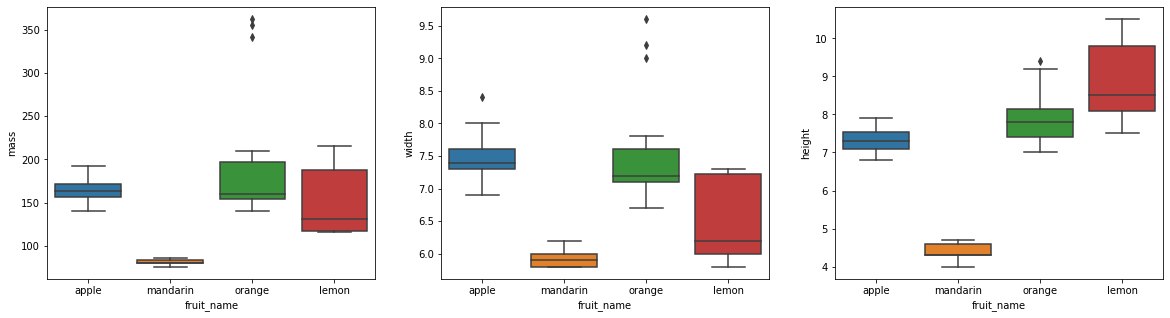

In [38]:
fig = plt.figure(figsize=(20,5))
col =  ['mass','width','height']

for i in range(len(col)):
    fig.add_subplot(1,3,i+1)
    sns.boxplot(y=df.loc[:,col[i]],x='fruit_name',data=df)

- there seems to have some outliers in orange
- height of lemon is more than others
- mandarian seems to have very low mass
- Apple is having more width than others

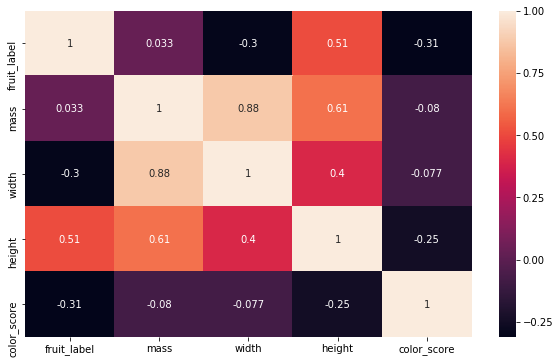

In [45]:
fig = plt.figure(figsize=(10,6))
corr = df.corr()

sns.heatmap(corr,annot=True)

width- mass, height- mass are highly correlated

In [69]:
from sklearn.model_selection import train_test_split

x =df.loc[:,['width','height','mass']]

y=df['fruit_name']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=3)

x_train.head()

,width,height,mass
30,7.1,7.5,158
58,6.1,8.1,118
45,7.2,9.2,186
16,7.6,7.5,156
15,7.7,7.1,156


In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

model = KNeighborsClassifier()

model.fit(x_train,y_train)

predict = model.predict(x_test)
print(model.score(x_test,y_test))

0.7222222222222222


In [71]:
print(accuracy_score(predict,y_test))

0.7222222222222222


In [72]:
print(cross_val_score(model,x,y,cv=10,scoring='accuracy').mean())

0.5852380952380952


In [73]:
print(model.predict([[7.3,9.3,150]]))

['apple']
